# 1. SETUP AND LOADING DATA

### 1.1 install dependencies and setup

In [3]:
!pip install tensorflow
!pip install opencv-python

  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Obtaining dependency information for tensorboard<2.17,>=2.16 from https://files.pythonhosted.org/packages/3a/d0/b97889ffa769e2d1fdebb632084d5e8b53fc299d43a537acee7ec0c021a3/tensorboard-2.16.2-py3-none-any.whl.metadata
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Obtaining dependency information for keras>=3.0.0 from https://files.pythonhosted.org/packages/59/a8/d94e8acb59d678d908fe1db0c7ad89dfa2c2e2e529eeb3c2b3cc218a758d/keras-3.1.1-py3-none-any.whl.metadata
  Using cached keras-3.1.1-py3-none-any.whl.metadata (5.6 kB)
Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl (377.0 MB)
Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
Usin

In [4]:
import tensorflow as tf
import os

In [5]:
gpus=tf.config.experimental.list_physical_devices('CPU')

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

### 1.2 Remove dodgy images

In [7]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [8]:
data_dir='data2'

In [10]:
os.listdir(data_dir)

['normal', 'Tumor']

In [11]:
os.listdir(os.path.join(data_dir,'Tumor'))

['010d7bf1d42726dc87e5bfea5a4bdb_big_gallery.jpeg',
 '1-Figure1-1.png',
 '1-s2.0-S2211568414002101-gr4.jpg',
 '1-s2.0-S2211568414002101-gr7.jpg',
 '11604_2022_1362_Fig10_HTML.jpg',
 '11604_2022_1362_Fig17_HTML.jpg',
 '13244_2018_661_Fig10_HTML.png',
 '13244_2018_661_Fig13_HTML.png',
 '13244_2018_661_Fig9_HTML.png',
 '13244_2020_888_Fig5_HTML.png',
 '15381tn.jpg',
 '15382tn.jpg',
 '15T-and-70T-MRI-for-metastatic-brain-tumor-of-non-small-cell-lung-carcinoma.png',
 '2009199_Understanding-Brain-Tumors-01.jpg',
 '3c7b18a8-c266-455c-b552-dd660d9fac50.jpg',
 '40644_2022_455_Fig5_HTML.png',
 '41598_2022_5572_Fig1_HTML.jpg',
 '41598_2022_5572_Fig2_HTML.jpg',
 '41598_2023_41407_Fig1_HTML.png',
 '61708-ts-stn-stockresize-brain-800x560-l.jpg',
 '627e8ef6c86629.33886164.jpg',
 'a-Original-MRI-brain-tumor-image-b-Colored-MRI-image.png',
 'a5097978405b9a_cortical-based2.jpg',
 'a5097978410f1c_TAB-Low-on-T2.jpg',
 'a509797841a53c_fibrillary-astrocytoma.jpg',
 'a50979784334cd_pinealis1.jpg',
 'adobesto

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print('image not in exist {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image data2\normal\1.jpg
Issue with image data2\normal\15533tn.jpg
Issue with image data2\normal\201311skinner-fig-3.gif
Issue with image data2\normal\234_2023_3189_Fig1_HTML.png
Issue with image data2\normal\2677257668_0920ecf431_b.jpg
Issue with image data2\normal\4128R-27184.webp
Issue with image data2\normal\41390_2023_2634_Fig1_HTML.png
Issue with image data2\normal\41582_2015_Article_BFnrneurol2015106_Fig1_HTML.jpg
Issue with image data2\normal\426415_1_En_63_Fig1_HTML.jpg
Issue with image data2\normal\5176e6a2ad4a6418e8b38792a5aedf_big_gallery.jpeg
Issue with image data2\normal\550422910a018ee003e624adc58e72_gallery.jpeg
Issue with image data2\normal\628075_Thumb_400.jpg
Issue with image data2\normal\650d9d4091bcad9cc95fa4ea_anatomy-of-the-human-brain.jpeg
Issue with image data2\normal\78de707f66bbf12bf2da188b96bb2e_big_gallery.jpeg
Issue with image data2\normal\9-Figure3-1.png
Issue with image data2\normal\A-Unhealthy-and-B-healthy-brain-images-in-the-dataset_Q320.jp

Issue with image data2\Tumor\13244_2020_888_Fig5_HTML.png
Issue with image data2\Tumor\15381tn.jpg
Issue with image data2\Tumor\15382tn.jpg
Issue with image data2\Tumor\15T-and-70T-MRI-for-metastatic-brain-tumor-of-non-small-cell-lung-carcinoma.png
Issue with image data2\Tumor\2009199_Understanding-Brain-Tumors-01.jpg
Issue with image data2\Tumor\3c7b18a8-c266-455c-b552-dd660d9fac50.jpg
Issue with image data2\Tumor\40644_2022_455_Fig5_HTML.png
Issue with image data2\Tumor\41598_2022_5572_Fig1_HTML.jpg
Issue with image data2\Tumor\41598_2022_5572_Fig2_HTML.jpg
Issue with image data2\Tumor\41598_2023_41407_Fig1_HTML.png
Issue with image data2\Tumor\61708-ts-stn-stockresize-brain-800x560-l.jpg
Issue with image data2\Tumor\627e8ef6c86629.33886164.jpg
Issue with image data2\Tumor\a-Original-MRI-brain-tumor-image-b-Colored-MRI-image.png
Issue with image data2\Tumor\a5097978405b9a_cortical-based2.jpg
Issue with image data2\Tumor\a5097978410f1c_TAB-Low-on-T2.jpg
Issue with image data2\Tumor\a5

In [176]:
image_exts=['jpeg','jpg','bmp','png']

### 1.2 loading the data

In [14]:
tf.data.Dataset??

In [15]:
import numpy as np

In [17]:
data=tf.keras.utils.image_dataset_from_directory('data2')

Found 293 files belonging to 2 classes.


In [18]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
# we use numpy to iterate in the data
data_iterator=data.as_numpy_iterator()

In [20]:
# images represented as arrays
batch=data_iterator.next()
batch[0].shape

(32, 256, 256, 3)

In [21]:
batch[1]

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

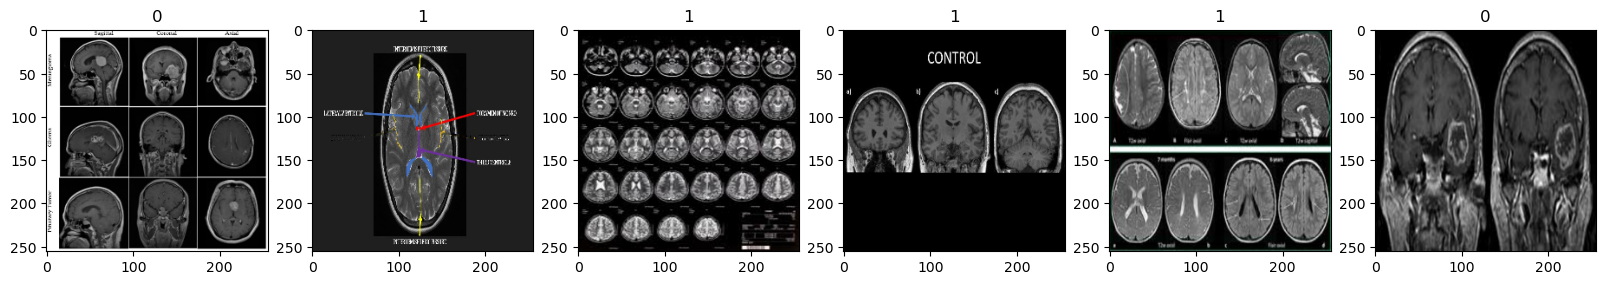

In [22]:
# to check the labels
fig, ax=plt.subplots(ncols=6,figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [185]:
# normal=1
# tumor=0

# 2. PREPROCESS

### 2.1. Scale data

In [23]:
batch[0].max()

255.0

In [24]:
# let us use a pipeline
data=data.map(lambda x,y:(x/255,y))
batch=data.as_numpy_iterator().next()
batch[0].max()

1.0

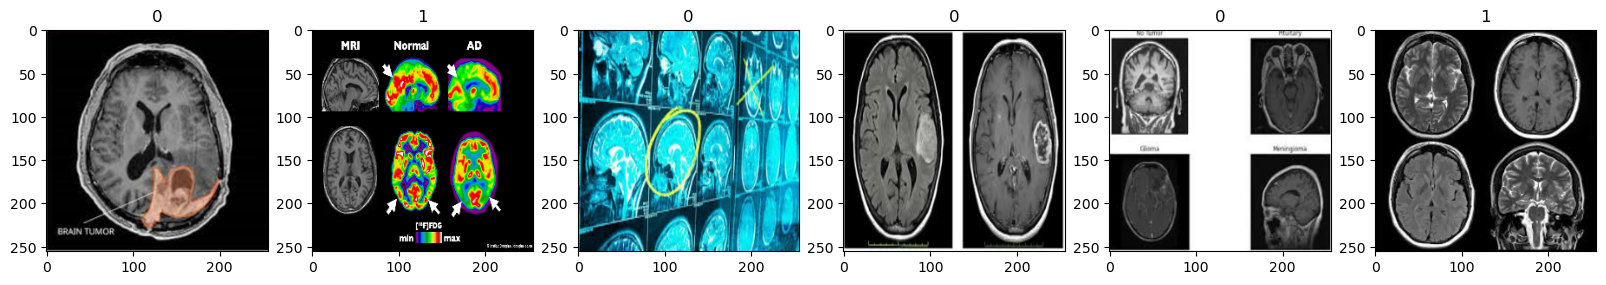

In [25]:
fig, ax=plt.subplots(ncols=6,figsize=(20,20))
for idx, img in enumerate(batch[0][:6]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2. split the data

In [26]:
len(data)

10

In [28]:
train_size=int(len(data)*.7)
test_size=int(len(data)*0.2)
validation_size=int(len(data)*0.1)

In [31]:
train_size

7

In [32]:
train=data.take(train_size)
val=data.skip(train_size).take(validation_size)
test=data.skip(train_size+validation_size).take(test_size)

# 3.Deep Learning Model

### 3.1 Build a deep learning model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [34]:
model=Sequential()

In [35]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train

In [38]:
logdir='logs'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [39]:
hist=model.fit(train, epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 196s 20s/step - accuracy: 0.4689 - loss: 0.8728 - val_accuracy: 0.5938 - val_loss: 0.6836
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.4743 - loss: 0.6985 - val_accuracy: 0.7812 - val_loss: 0.6826
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8572 - loss: 0.6798 - val_accuracy: 0.8438 - val_loss: 0.6563
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.8402 - loss: 0.6311 - val_accuracy: 0.7812 - val_loss: 0.5451
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8186 - loss: 0.4970 - val_accuracy: 0.7812 - val_loss: 0.4209
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7786 - loss: 0.4346 - val_accuracy: 0.8438 - val_loss: 0.4021
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9220 - loss: 0.3585 - val_accuracy: 0.9062 - val_loss: 0.2604
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9267 - loss: 0.2455 - val_accuracy: 0.8750 - val_loss: 0.2453
Epoch 9

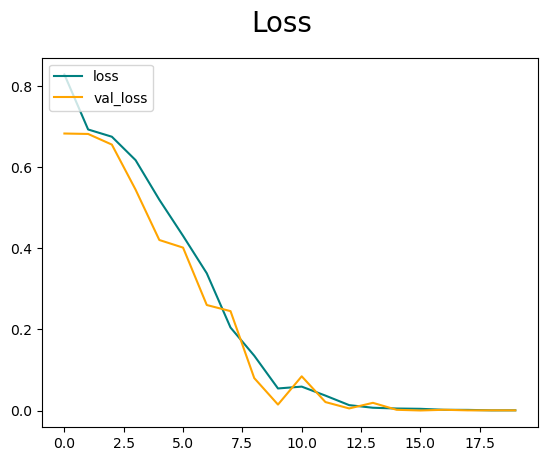

In [40]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange', label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

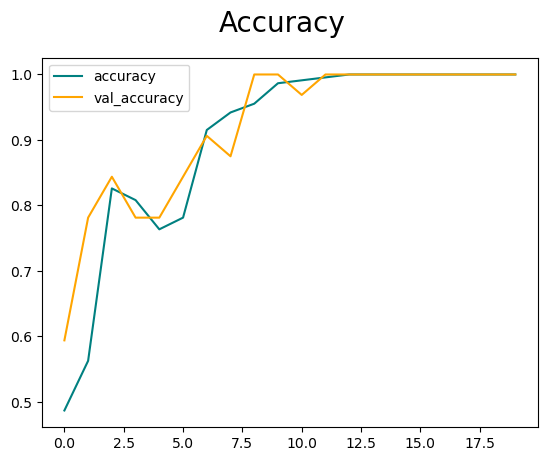

In [42]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange', label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

# 4. Evaluate Performance

### 4.1. Evaluate

In [43]:
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall
from tensorflow.keras.metrics import BinaryAccuracy

In [44]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [46]:
print(f'Precison:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precison:1.0,Recall:1.0,Accuracy:1.0


### 4.2. Test

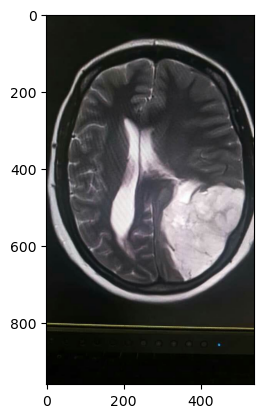

In [60]:
imag2=cv2.imread('TEST3.jpg')
plt.imshow(cv2.cvtColor(imag2,cv2.COLOR_BGR2RGB))
plt.show()

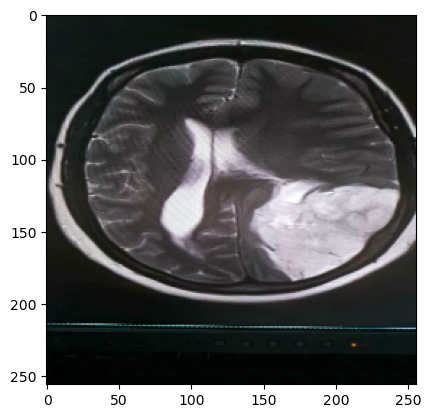

In [61]:
resize=tf.image.resize(imag2,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
resize.shape

TensorShape([256, 256, 3])

In [63]:
np.expand_dims(resize,0)

array([[[[21.625, 28.625, 25.625],
         [21.625, 28.625, 25.625],
         [21.625, 28.625, 25.625],
         ...,
         [20.   , 20.   , 20.   ],
         [20.   , 20.   , 20.   ],
         [20.   , 20.   , 20.   ]],

        [[19.   , 26.   , 23.   ],
         [19.   , 26.   , 23.   ],
         [19.   , 26.   , 23.   ],
         ...,
         [20.   , 20.   , 20.   ],
         [20.   , 20.   , 20.   ],
         [20.   , 20.   , 20.   ]],

        [[21.   , 28.   , 25.   ],
         [21.   , 28.   , 25.   ],
         [21.   , 28.   , 25.   ],
         ...,
         [20.   , 20.   , 20.   ],
         [20.   , 20.   , 20.   ],
         [20.   , 20.   , 20.   ]],

        ...,

        [[ 3.   ,  3.   ,  3.   ],
         [ 3.   ,  3.   ,  3.   ],
         [ 3.   ,  3.   ,  3.   ],
         ...,
         [ 2.   ,  9.   ,  6.   ],
         [ 2.   ,  9.   ,  6.   ],
         [ 2.   ,  9.   ,  6.   ]],

        [[ 3.   ,  3.   ,  3.   ],
         [ 3.   ,  3.   ,  3.   ],
         [ 3

In [64]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


array([[0.10186057]], dtype=float32)

In [65]:
if yhat>0.5:
    print(f'Predicted Class is Normal')
else: 
    print(f'Predicted Class is malignant')

Predicted Class is malignant


# 5. save the model

### 5.1. Save model

In [69]:
from tensorflow.keras.models import load_model
model.save(os.path.join('Notebooks','Normal_Malignant_models.h5'))

In [70]:
new_model=load_model(os.path.join('models','Normal_Malignant_models.h5'))

In [71]:
yhat=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [73]:
if yhat>0.5:
    print(f'Predicted Class is Normal')
else: 
    print(f'Predicted Class is Malignant')

Predicted Class is Malignant
